# MindTech : Data Cleaning and EDA

### 1. Introduction
The dataset is from Kaggle and is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. Working in tech is known to be heavily involved and demanding, with many reports of depreciating mental health. What spurred me to do analysis on this topics was because I have family working in tech and saw how it can have a toll on them. And someone who wants to pursue my career in this field I want to do research on what are the main reasons for having a declining mental health when working in this industry. I want to see based on the data provided how people who need help can be predicted based on different factors, before things get serious.

### 2. Load , Inspect and Cleaning

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('survey.csv')
print(df.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [57]:
df.isnull()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1255,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1256,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1257,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [58]:
drop_cols = [
    'comments',
    'state',
    'Timestamp',
    'Country',      # Drop unless you're doing geo analysis
    'no_employees',
    'phys_health_interview',
    'mental_vs_physical',
    'obs_consequence',
    'work_interfere',  # Optional: can keep if cleaned
]

df = df.drop(columns=drop_cols)
df

,Age,Gender,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview
0,37,Female,NaN,No,Yes,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No
1,44,M,NaN,No,No,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No
2,32,Male,NaN,No,No,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes
3,31,Male,NaN,Yes,Yes,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe
4,31,Male,NaN,No,No,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No
1255,32,Male,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No
1256,34,male,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No
1257,46,f,No,No,No,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No


In [59]:
df.loc[df['Gender'].str[0] == 'F', 'Gender'] = 'Female'
df.loc[df['Gender'].str[0] == 'f', 'Gender'] = 'Female'
df.loc[df['Gender'].str[0] == 'M', 'Gender'] = 'Male'
df.loc[df['Gender'].str[0] == 'm', 'Gender'] = 'Male'

df

,Age,Gender,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview
0,37,Female,NaN,No,Yes,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No
1,44,Male,NaN,No,No,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No
2,32,Male,NaN,No,No,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes
3,31,Male,NaN,Yes,Yes,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe
4,31,Male,NaN,No,No,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,No,No,Yes,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No
1255,32,Male,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No
1256,34,Male,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No
1257,46,Female,No,No,No,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No


In [60]:
df.dropna(inplace=True)
df

,Age,Gender,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview
18,46,Male,Yes,Yes,No,Yes,Yes,Yes,Not sure,Yes,Don't know,Yes,Very easy,No,No,Yes,Yes,No
19,36,Male,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe
20,29,Male,No,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No
21,31,Male,Yes,No,No,Yes,Yes,No,No,No,No,Yes,Somewhat difficult,No,No,Some of them,Some of them,No
22,46,Male,No,No,Yes,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,No,No,Yes,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No
1255,32,Male,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No
1256,34,Male,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No
1257,46,Female,No,No,No,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No


In [61]:
df = df.drop_duplicates()
df

,Age,Gender,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview
18,46,Male,Yes,Yes,No,Yes,Yes,Yes,Not sure,Yes,Don't know,Yes,Very easy,No,No,Yes,Yes,No
19,36,Male,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe
20,29,Male,No,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No
21,31,Male,Yes,No,No,Yes,Yes,No,No,No,No,Yes,Somewhat difficult,No,No,Some of them,Some of them,No
22,46,Male,No,No,Yes,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,No,No,Yes,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No
1255,32,Male,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No
1256,34,Male,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No
1257,46,Female,No,No,No,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No


In [62]:
df = df[(df['Age'] >= 16) & (df['Age'] <= 100)]
df

,Age,Gender,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview
18,46,Male,Yes,Yes,No,Yes,Yes,Yes,Not sure,Yes,Don't know,Yes,Very easy,No,No,Yes,Yes,No
19,36,Male,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe
20,29,Male,No,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No
21,31,Male,Yes,No,No,Yes,Yes,No,No,No,No,Yes,Somewhat difficult,No,No,Some of them,Some of them,No
22,46,Male,No,No,Yes,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,No,No,Yes,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No
1255,32,Male,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No
1256,34,Male,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No
1257,46,Female,No,No,No,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No


In [80]:
df.to_csv('updated_data.csv', index=False)

### 3. Exploratory Data Analysis

Text(0.5, 1.0, 'Age Distribution')

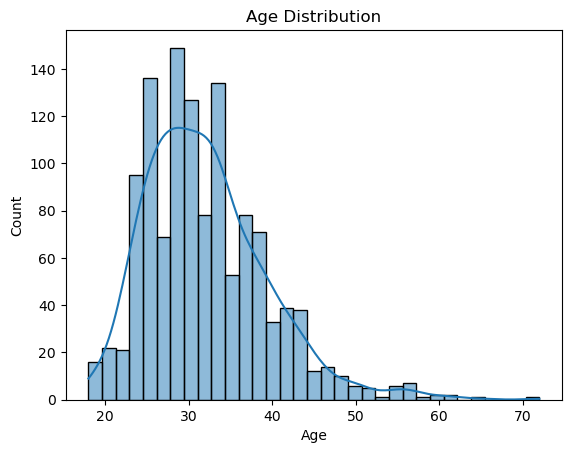

In [63]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Gender Distribution')

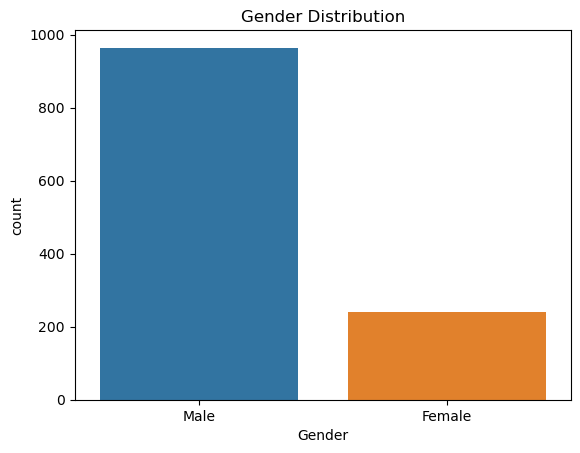

In [64]:
df_gendered = df[df['Gender'].isin(['Male', 'Female'])]
sns.countplot(x='Gender', data=df_gendered)
plt.title('Gender Distribution')


Text(0.5, 1.0, 'Who seeks treatment more by gender?')

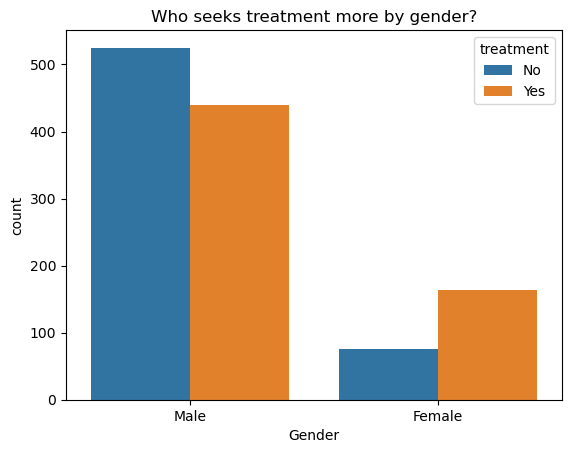

In [65]:
df_gendered = df[df['Gender'].isin(['Male', 'Female'])]
sns.countplot(x='Gender', hue='treatment', data=df_gendered)
plt.title('Who seeks treatment more by gender?')

Text(0.5, 1.0, 'Is there an age pattern in treatment?')

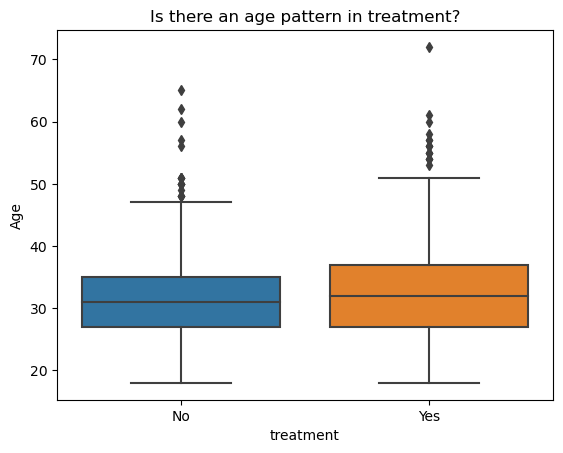

In [66]:
sns.boxplot(x='treatment', y='Age', data=df)
plt.title('Is there an age pattern in treatment?')

Text(0.5, 1.0, 'Does working in a tech company mean more oppurtunities to work remotely?')

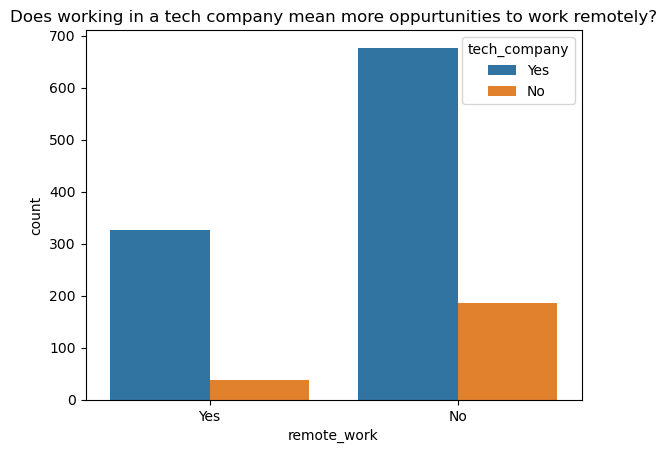

In [67]:
sns.countplot(x='remote_work',hue = "tech_company", data=df)
plt.title("Does working in a tech company mean more oppurtunities to work remotely?")

Text(0.5, 1.0, 'Do you recieve benefits when working in a tech company?')

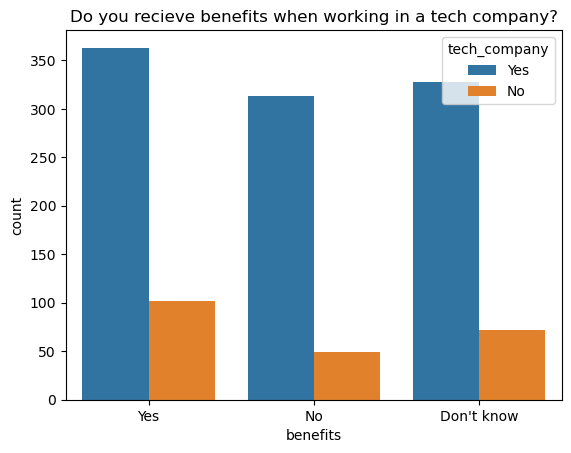

In [68]:
sns.countplot(x='benefits', hue = "tech_company", data=df)
plt.title("Do you recieve benefits when working in a tech company?")

Text(0.5, 1.0, 'Proportion of Respondents Seeking help')

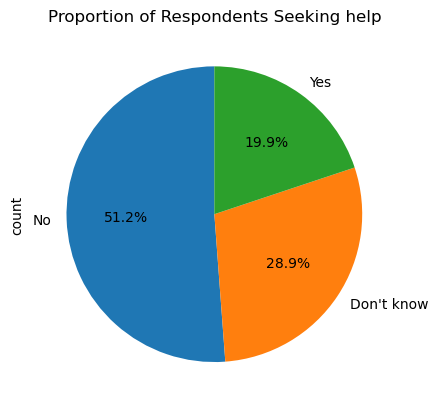

In [69]:
df['seek_help'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Respondents Seeking help")

Text(0.5, 1.0, 'Do mental health benefits influence treatment?')

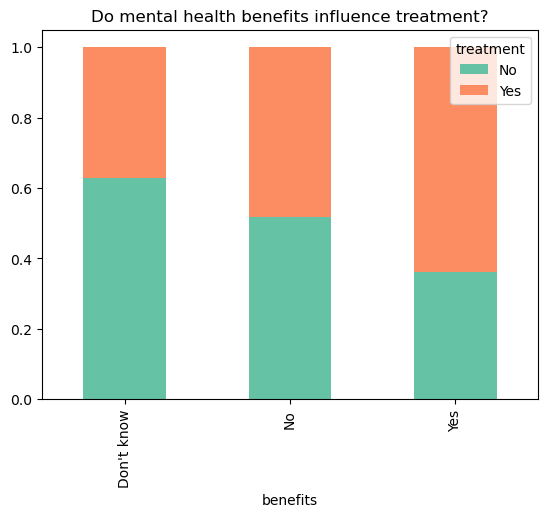

In [70]:
pd.crosstab(df['benefits'], df['treatment'], normalize='index').plot(
    kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'])
plt.title("Do mental health benefits influence treatment?")

<Axes: xlabel='remote_work', ylabel='count'>

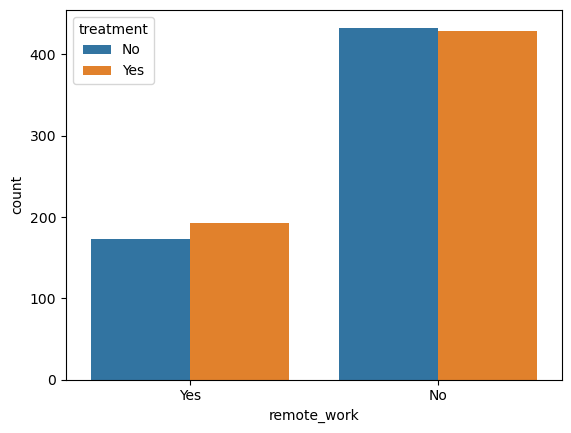

In [71]:
sns.countplot(x='remote_work', hue='treatment', data=df)

Text(0.5, 1.0, 'Does access to care make a difference?')

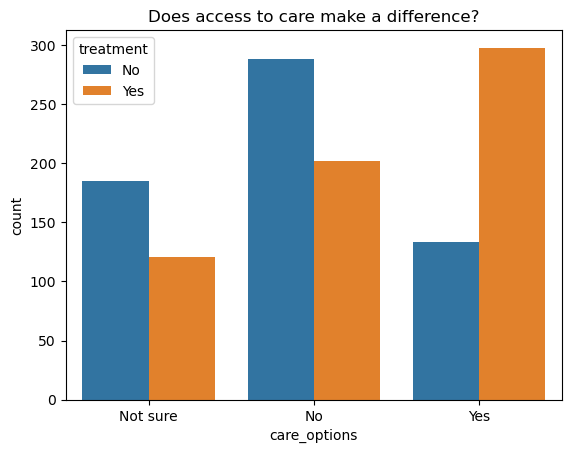

In [72]:
sns.countplot(x='care_options',hue = "treatment", data=df)
plt.title("Does access to care make a difference?")

Text(0.5, 1.0, 'Which age groups seek help the most?')

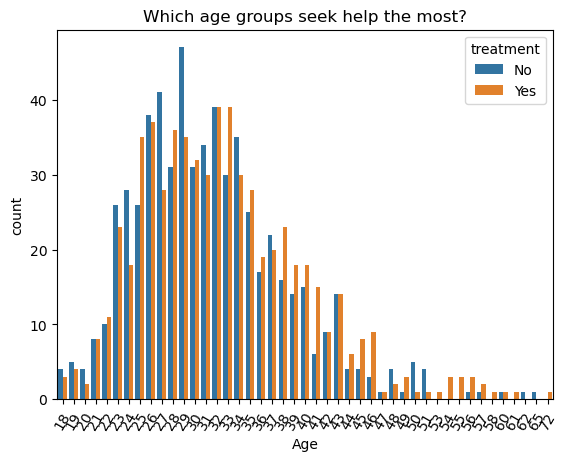

In [73]:
sns.countplot(x='Age',hue = "treatment", data=df)
plt.xticks(rotation=60)
plt.title("Which age groups seek help the most?")

In [79]:
import plotly.express as px

df_sunburst = df[df['Gender'].isin(['Male', 'Female'])]

fig = px.sunburst(
    df_sunburst,
    path=['Gender', 'remote_work', 'treatment'],
    title="Treatment Breakdown by Gender and Remote Work"
)
fig.show()

### 4. Key Insights

#### 4.1 Gender and Mental Health Treatment
- A **higher percentage of female respondents** reported receiving treatment overall.

- Among men, those who work remotely are more likely to receive treatment **(47%)** than those who do not work remotely **(44%)**.

- Among women, those working remotely are also more likely to receive treatment **(72%)** compared to those not working remotely **(67%)**.

- This could suggest that **remote work provides both men and women with more opportunities to prioritize their mental health**, compared to those who work in-office. It also raises the question of whether in-office employees may experience more pressure or have less accessible support for mental health struggles.

- The data shows that women are more likely to access mental health support whether they are remote or in-office, compared to men. This could suggest a need for **more accessible, targeted support for men, both in the workplace and remotely**. It also highlights the importance of addressing stigma around men's mental health and encouraging open conversations.

#### 4.2 Age Distribution

- **Highest Treatment Rates**:
  - Individuals aged **26–35** and **36–45** reported the **highest rates** of mental health treatment.
  - These age groups often face pressures related to careers, finances, and family, increasing stress and prompting them to seek treatment.

- **Young Adults (18–25)**:
  - May face **access barriers** such as cost, so it is less likely for them to access mental health help.
  - High stigma and fear of judgment may prevent them from reaching out, especially in academic or early workplace settings.

- **Midlife Adults (26–45)**:
  - Likely benefit from **better access** to healthcare through employment.
  - More likely to recognize symptoms and seek help due to past experiences or growing awareness.

- **Older Adults (55+)**:
  - May be impacted by **generational stigma** surrounding mental health.
  - Could also face **digital access issues**, reducing their ability to benefit from online therapy or remote care options.

This suggests: 
- Increase early support and de-stigmatization efforts for young adults.
- Improve access and outreach for older adults, possibly through in-person and age-friendly services.
